In [132]:
#!/usr/bin/env python
# coding: utf-8

import os
import numpy as np
from numpy import asarray

import tensorflow
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, UpSampling2D, Reshape, Dropout, Conv2D, MaxPooling2D, BatchNormalization

from azureml.core import Run

import matplotlib.pyplot as plt

In [133]:
(train_x, train_y), (test_x, test_y) = tensorflow.keras.datasets.mnist.load_data()
(train_y, test_y) = [utils.to_categorical(elem) for elem in (train_y, test_y)]

train_x, test_x = [elem/255 for elem in [train_x, test_x]]

(train_x, test_x) = [asarray(s.reshape(s.shape[0], 28, 28, 1)) for s in [train_x, test_x]]

shapes = [print(the_set.shape) for the_set in [train_x, train_y, test_x, test_y]]


(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [205]:
features = 10
pool = (7,7)
model = Sequential()
model.add(Conv2D(features, kernel_size = (3,3), input_shape = (28,28,1), strides =(1, 1), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool))
model.add(Reshape((int((28*28)/(pool[0]*pool[1])*features),)))
model.add(Dense(10))
model.add(Activation("sigmoid"))
model.compile(optimizer='rmsprop', loss=tensorflow.keras.losses.CategoricalCrossentropy(), metrics=['mean_squared_error','mean_absolute_error','accuracy'])

In [206]:
epochs = 50
#history = model.train_on_batch(train_x,train_y,epochs=50,verbose=False)
history = model.fit(train_x,train_y, batch_size=32, epochs=epochs, shuffle=True, steps_per_epoch=32)
score = model.evaluate(test_x,test_y)

Train on 60000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 218us/sample - loss: 0.1385 - mean_squared_error: 0.0783 - mean_absolute_error: 0.0830 - accuracy: 0.9572


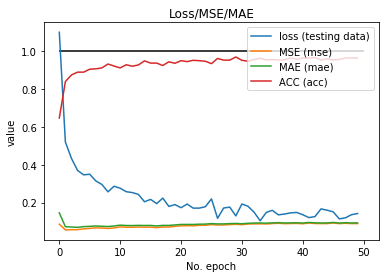

In [207]:
#plt.plot(history.history['accuracy'], label='accuracy (testing data)')
plt.plot(history.history['loss'], label='loss (testing data)')

#plt.axis([0, len(history.history['mean_squared_error']), 0, 0.02])
plt.plot(history.history['mean_squared_error'], label='MSE (mse)')
plt.plot(history.history['mean_absolute_error'], label='MAE (mae)')
plt.plot(history.history['accuracy'], label='ACC (acc)')
plt.hlines(y=1,xmin=0, xmax=epochs)
plt.title('Loss/MSE/MAE')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
#plt.savefig("loss.png")


In [174]:
run = Run.get_context()
run.log('accuracy', score[0])
run.log_image('loss', plot=plt)

Attempted to log scalar metric accuracy:
0.082797499361448
Attempted to log image metric loss:
<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>


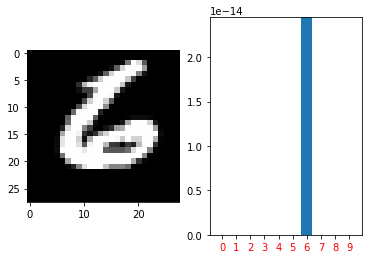

In [179]:
img = test_x[9999]
img = img.reshape((28,28))
r = model.predict(img.reshape(1,28,28,1))

f, (pic, estimate) = plt.subplots(1,2)

estimate.bar(range(10), height=r[0])
estimate.xticks = 10

plt.sca(estimate)
plt.xticks(range(10), color='red')

pic.imshow(img,cmap="gray")

f.show()

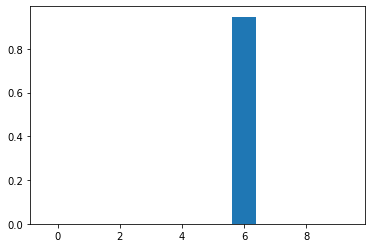